<h1 style="color:blue"> Bayesian Statistics and Probabilistic Programming</h1>

<h1 style="color:blue"> Spring 2024 - Homework 01</h1>

<h3 style="color:blue">2024-03-25</h3>

<h1 style="color:blue">Contributors</h1>

### Adriana Alvaro Email: aalvarma106@alumnes.ub.edu
### Madison Chester Email: mchestch7@alumnes.ub.edu
### Dafni Tziakouri Email: dtziaktz7@alumnes.ub.edu
### Arturo Fredes Email: afredeca7@alumnes.ub.edu

<h1 style="color:blue">Exercises</h1>

# Exercise 1: Placenta previa

This exercise pertains to what we studied in `Binomial.3.Placenta.previa.pub.ipynb`.

## Exercise 1.1

Compute the posterior pdf, and both prior and posterior predictor pmf for the placenta previa problem, using a conjugate $\textrm{Beta}(\alpha,\beta)$ prior, for several values of the parameters, obtaining for each of them a 95% (centered) credible interval and the MAP and posterior expectation estimators of $\theta$. In particular, reproduce Figure 2.3 and Table 2.1 in BDA3 [1]. Do the same for those $\alpha_0$ and $\beta_0$ such that $\textrm{Beta}(\alpha_0,\beta_0)$ has the same expectation and variance than the piecewise linear nonconjugate prior. Compare the posterior quantities with both priors.

[1] _Bayesian Data Analysis - Third edition_ **(BDA3),** pag. 37.

Since we're dealing with a Bernoulli trial (success or failure), the likelihood function is given by the binomial probability mass function:
\begin{equation}
    f(x|\theta)=\theta^{x}\cdot(1-\theta)^{(n-x)}
\end{equation}

Where,
- x is the number of successes (placenta previa cases),

- n is the total number of trials (total pregnancies),

- θ is the probability of success (the parameter we want to estimate).



We'll use a Beta distribution as the prior, which is conjugate to the binomial likelihood function. The Beta distribution has two shape parameters, α and β:
\begin{equation}
    \text{Beta}(\theta \mid \alpha, \beta) = \frac{\theta^{\alpha - 1} \cdot (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)}
\end{equation}

Where,
- B(α,β) is the Beta function, serving as the normalizing constant.


Using Bayes' theorem, we can compute the prior predictive pmf of x, which is called the Beta-Binomial distribution.
\begin{equation}
    p(x) = \int_{\Theta} f(x \mid \theta) Beta(\theta \mid \alpha, \beta) d\theta = \frac{1}{B(\alpha, \beta)} B(\alpha + x, \beta + n - x)
\end{equation}

Since the Bernoulli likelihood and the Beta prior are conjugate pairs, the posterior pdf will also be a Beta distribution with updated parameters, and the posterior predictive pmf will be a Beta-Binomial with parameters updated according to the evidence. In particular:

\begin{equation}
    Posterior\ pdf: Beta(\alpha + x, \beta + n - x)
\end{equation}

\begin{equation}
    Posterior\ predictive\ pmf: Beta-Binomial(n,\alpha + x, \beta + n - x)
\end{equation}


In [55]:
# Given data
n <- 980
x <- 437

We will take advantage of the knowledge of the posterior distributions given by the use of conjugate pairs to easily obtain a 95% (centered) credible interval and the MAP and posterior expectation estimators of $\theta$.
\begin{equation}
    p_{\text{MAP}} = \frac{x + \alpha - 1}{n + \alpha + \beta - 2}
\end{equation}

\begin{equation}
    E[\theta] = \frac{x + \alpha}{n + \alpha + \beta}
\end{equation}

We now define a function that will compute all of this values.

In [56]:
# Function to compute the Beta posterior parameters and quantities
compute_beta_posterior <- function(alpha, beta, x, n) {
  # Compute posterior parameters
  alpha_post <- alpha + x
  beta_post <- beta + n - x

  # Compute 95% centered credible interval
  credible_interval <- qbeta(c(0.025, 0.975), alpha_post, beta_post)

  # Compute the median of the Beta posterior
  median_posterior <- qbeta(0.5, alpha_post, beta_post)

  # Compute MAP estimator
  map_estimator <- (x + alpha - 1) / (n + alpha + beta - 2)

  # Compute posterior expectation estimator
  posterior_expectation <- alpha_post / (alpha_post + beta_post)

  return(list(alpha_post = alpha_post, beta_post = beta_post, credible_interval = credible_interval, median_posterior = median_posterior,
              map_estimator = map_estimator, posterior_expectation = posterior_expectation))
}

In [57]:
# Function to compute the Beta_binomial expectation and variance
compute_beta_binomial_statistics <- function(alpha, beta,n) {

  # Compute variance
  variance <- (alpha*beta*(alpha + beta + n)) / ((alpha + beta)^2 * (alpha + beta + 1))

  # Compute expectation estimator
  expectation <- n * alpha / (alpha + beta)

  return(list(expectation = expectation, variance=variance))}

We will try it for different parameters of $\alpha$ and $\beta$

In [58]:
# Define several values of alpha and beta for the Beta prior
alpha_values <- c(0.5, 1, 2, 5, 10)
beta_values <- c(0.5, 1, 2, 5, 10)

# Initialize lists to store results
results <- list()

# Compute posterior for each combination of alpha and beta
for (alpha in alpha_values) {
  for (beta in beta_values) {
    # Compute posterior parameters and quantities
    result <- compute_beta_posterior(alpha, beta, x, n)
    # Store results
    results[[paste("alpha", alpha, "beta", beta)]] <- result
  }
}

# Print results
for (key in names(results)) {
  alpha_beta <- unlist(strsplit(key, " "))

  alpha <- alpha_beta[2]
  beta <- alpha_beta[4]
  cat("Alpha:", alpha, "- Beta:", beta, "\n")
  cat("Posterior parameters (alpha_post, beta_post):", results[[key]]$alpha_post, ",", results[[key]]$beta_post, "\n")
  cat("95% Credible Interval:", results[[key]]$credible_interval, "\n")
  cat("MAP Estimator:", results[[key]]$map_estimator, "\n")
  cat("Posterior Expectation Estimator:", results[[key]]$posterior_expectation, "\n")
  cat("\n")
}



Alpha: 0.5 - Beta: 0.5 
Posterior parameters (alpha_post, beta_post): 437.5 , 543.5 
95% Credible Interval: 0.4149953 0.4771604 
MAP Estimator: 0.4458631 
Posterior Expectation Estimator: 0.4459735 

Alpha: 0.5 - Beta: 1 
Posterior parameters (alpha_post, beta_post): 437.5 , 544 
95% Credible Interval: 0.4147779 0.4769241 
MAP Estimator: 0.4456355 
Posterior Expectation Estimator: 0.4457463 

Alpha: 0.5 - Beta: 2 
Posterior parameters (alpha_post, beta_post): 437.5 , 545 
95% Credible Interval: 0.4143439 0.4764523 
MAP Estimator: 0.445181 
Posterior Expectation Estimator: 0.4452926 

Alpha: 0.5 - Beta: 5 
Posterior parameters (alpha_post, beta_post): 437.5 , 548 
95% Credible Interval: 0.4130473 0.4750424 
MAP Estimator: 0.4438231 
Posterior Expectation Estimator: 0.4439371 

Alpha: 0.5 - Beta: 10 
Posterior parameters (alpha_post, beta_post): 437.5 , 553 
95% Credible Interval: 0.4109044 0.4727109 
MAP Estimator: 0.4415781 
Posterior Expectation Estimator: 0.4416961 

Alpha: 1 - Beta:

Now we will try to reproduce the image 2.3 of [1]. In there they calculated that when using a uniform prior distribution for the probability of a girl birth, the posterior distribution is Beta(438, 544). The images represent:

1. The distribution of taking 1000 draws of this posterior distribution.

2. logit transform $log(\frac{\theta}{1 − \theta})$, which transforms the parameter space from the unit interval to the real line. This is done to apply a normal approximation to $\theta$ which only takes values in [0,1], while the normal distribution is defined on the reals.

3. Male-to-female sex ratio $\phi = \frac{1 − \theta}{\theta}$

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

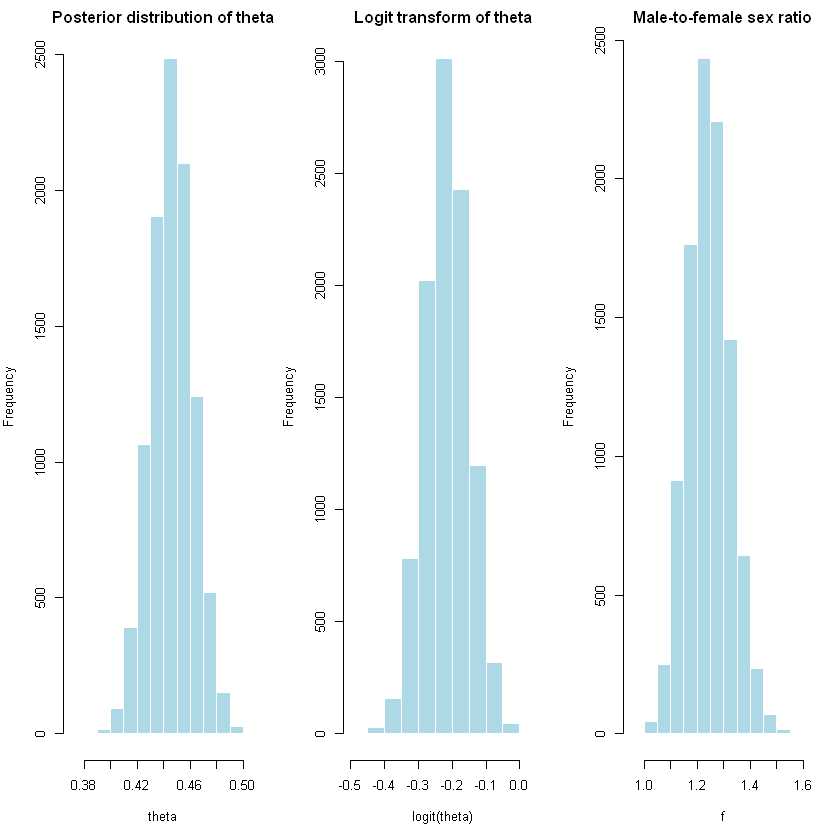

In [59]:
# Plot histograms of the posterior distributions
par(mfrow = c(1, 3), mar = c(5, 4, 2, 1))

# (a) Posterior distribution of θ
theta_samples <- rbeta(10000, 438, 544)
hist(theta_samples, main = "Posterior distribution of theta", xlab = "theta", col = "lightblue", border = "white")

# (b) Logit transform of θ
logit_theta_samples <- log(theta_samples / (1 - theta_samples))
hist(logit_theta_samples, main = "Logit transform of theta", xlab = "logit(theta)", col = "lightblue", border = "white")

# (c) Male-to-female sex ratio φ = (1 − θ)/θ (f)
sex_ratio_samples <- (1 - theta_samples) / theta_samples
hist(sex_ratio_samples, main = "Male-to-female sex ratio", xlab = "f", col = "lightblue", border = "white")

We also want to reproduce Table 2.2 that we can see here:

| α / (α + β) | α + β | Posterior median of θ | 95% posterior interval for θ |
|-------------|-------|------------------------|------------------------------|
| 0.500       | 2     | 0.446                  | [0.415, 0.477]               |
| 0.485       | 2     | 0.446                  | [0.415, 0.477]               |
| 0.485       | 5     | 0.446                  | [0.415, 0.477]               |
| 0.485       | 10    | 0.446                  | [0.415, 0.477]               |
| 0.485       | 20    | 0.447                  | [0.416, 0.478]               |
| 0.485       | 100   | 0.450                  | [0.420, 0.479]               |
| 0.485       | 200   | 0.453                  | [0.424, 0.481]               |


To do so we obtained the values of $\alpha$ and $\beta$, and call the function that we previously defined.

In [60]:
# Initialize a dataframe to store the results
table_data <- data.frame(
  Prior_Probability = numeric(),
  Prior_Sum = numeric(),
  Posterior_Median = numeric(),
  Posterior_95CI_Lower = numeric(),
  Posterior_95CI_Upper = numeric(),
  stringsAsFactors = FALSE
)

# Define the prior alpha and beta values
prior_expt <- 0.485 # alpha/(alpha + beta)
prior_sum_values <- c(2, 5, 10, 20, 100, 200) # alpha + beta



# Compute the posterior for each combination of prior alpha and beta
for (prior_sum in prior_sum_values) {

  prior_alpha <- prior_expt * prior_sum
  prior_beta <- prior_sum - prior_alpha


  # Compute posterior parameters and quantities
  posterior_result <- compute_beta_posterior(prior_alpha, prior_beta, x, n)

  # Round posterior summaries to three significant figures
  posterior_median <- signif(posterior_result$median_posterior, digits = 3)
  posterior_lower <- signif(posterior_result$credible_interval[1], digits = 3)
  posterior_upper <- signif(posterior_result$credible_interval[2], digits = 3)

  # Store the results in the dataframe
  table_data <- rbind(table_data, c(prior_expt, prior_sum,
                                    posterior_median,
                                    posterior_lower, posterior_upper))
}

# Rename the columns
colnames(table_data) <- c("α/α+β", "α+β",
                          "Posterior_Median", "Posterior_95CI_Lower", "Posterior_95CI_Upper")

# Print the table
print(table_data)


  a/a+ß a+ß Posterior_Median Posterior_95CI_Lower Posterior_95CI_Upper
1 0.485   2            0.446                0.415                0.477
2 0.485   5            0.446                0.415                0.477
3 0.485  10            0.446                0.415                0.477
4 0.485  20            0.447                0.416                0.478
5 0.485 100            0.450                0.420                0.479
6 0.485 200            0.453                0.424                0.481


As we can see we could reproduce the results pretty well.

Now we wil use a nonconjugate piecewise linear prior. We will start by defining the prior function `h()`:
$$
    h(t)=\left\{
    \begin{array}{lcl}
         a,        &\text{ for }  &0<t<m-c \quad\text{and } m+c<t<1,\\
         A+b\cdot t/c,  &\text{ for }  &t\in [m-c,m],\\
         B-b\cdot t/c   &\text{ for }  &t\in [m,m+c],\\
    \end{array}
    \right.\mskip80mu t \in[0,1]
$$

where $a=0.50$, $b=5.00$ is the height of the central triangle ($a+b$ is the peak ordinate), $A=a+b-(b\cdot m)/c$,
$B<-a+b+(b\cdot m)/c$.

In the following code we define the parameters and the function, plot the distribution, and obtain the expectation, variance and integral.

[1] "Integral: 1.0000006675957"
[1] "Expectation: 0.492499873385333"
[1] "Variance: 0.0425577079797754"


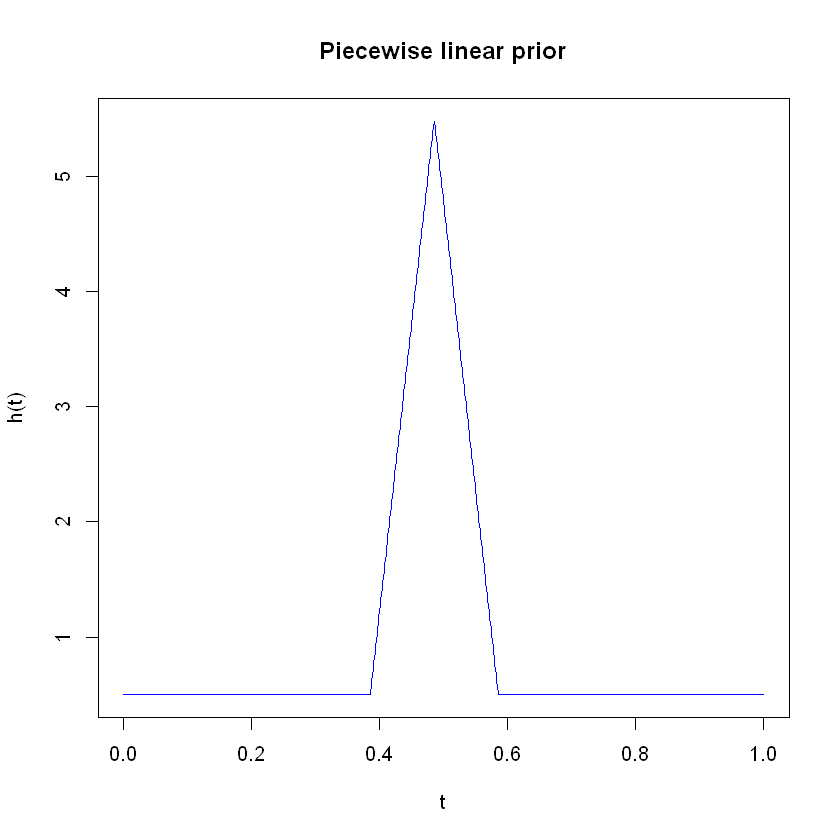

In [61]:
#define parameters and function
m<-0.485
c<-0.100
p.tails<-0.4
a<-0.5
b<-5.0
A<-a+b-(b*m)/c
B<-a+b+(b*m)/c
h<-function(t){return(a*(t>=0)*(t<m-c)+a*(t>m+c)*(t<=1)+(A+b*t/c)*(t>m-c)*(t<m)+(B-b*t/c)*(t>m)*(t<m+c))}

# Create a sequence of t values
t_values <- seq(0, 1, length.out = 1000)
# Compute h(t) for each t value
h_values <- sapply(t_values, h)

# Plot the function
plot(t_values, h_values, type = 'l', col = 'blue', xlab = 't', ylab = 'h(t)', main = 'Piecewise linear prior')


integral <- integrate(h, lower = 0, upper = 1)$value
print(paste("Integral:",integral))  # Should be approximately 1

# Compute expectation and variance
expectation <- integrate(function(t) t* h(t), lower = 0, upper = 1)$value
variance <- integrate(function(t) (t - expectation)^2 * h(t), lower = 0, upper = 1)$value

print(paste("Expectation:", expectation))
print(paste("Variance:", variance))

The expectation of piecewise linear nonconjugate prior is 0.492499873385333 and the variance 0.0425577079797754. So, we will now solve the equation problem to find the values $\alpha_0$ and $\beta_0$ such that $\textrm{Beta}(\alpha_0,\beta_0)$ has the same expectation and variance than the piecewise linear nonconjugate prior. We will use the formulas for the beta prior that we introduced at the begining of the exercise.

In [62]:
# Define the equations for expected value and variance
equations <- function(ab, exp, var) {
  a <- ab[1]
  b <- ab[2]
  e <- a / (a + b) - exp
  v <- a * b / ((a + b)^2 * (a + b + 1)) - var
  return(e^2 + v^2)  # We optimize the sum of squares to find the root
}

# Given values
exp_value <- expectation
var_value <- variance

# Perform optimization
result <- optim(c(0.1, 100), equations, exp = exp_value, var = var_value, method = "L-BFGS-B", lower = c(0.01, 0.01), upper = c(100, 100))

# Extract the solution
a_solution <- result$par[1]
b_solution <- result$par[2]

# Print the solution
cat("Solution:\n")
cat("a:", a_solution, "\n")
cat("b:", b_solution, "\n")


Solution:
a: 2.399999 
b: 2.473097 


So, we have that $\alpha_0 = 2.399999$ and $\beta_0 = 2.473097$ and $\textrm{Beta}(2.399999,2.473097)$

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

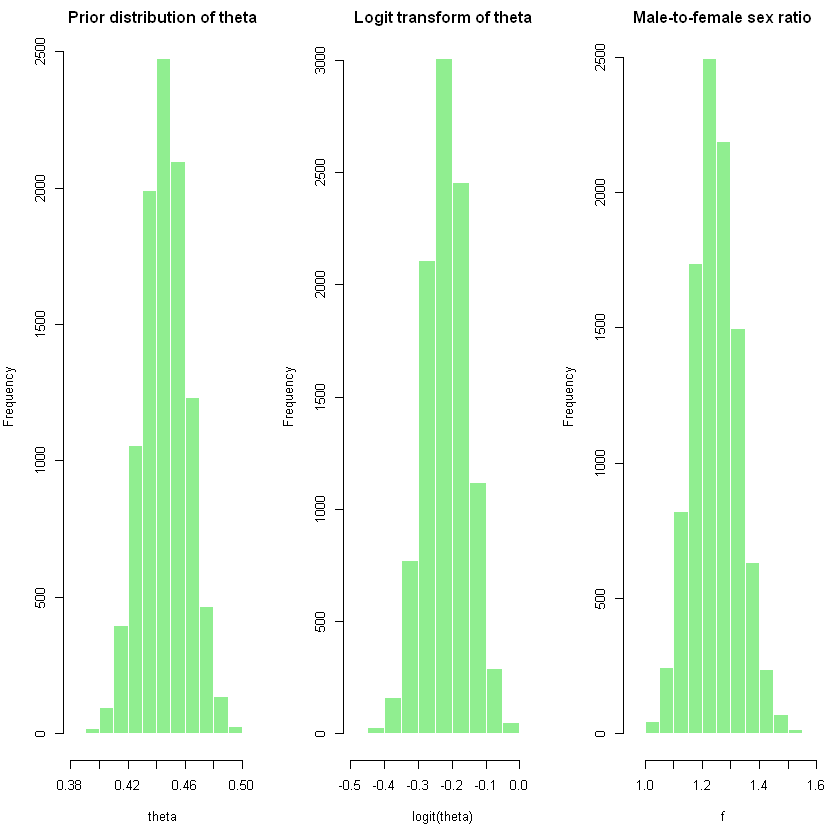

In [63]:
# Plot histograms of the posterior distributions
par(mfrow = c(1, 3), mar = c(5, 4, 2, 1))

# Compute posterior parameters
alpha_solution_post <- a_solution + x
beta_solution_post <- b_solution + n - x

# (a) Posterior distribution of θ
theta_samples <- rbeta(10000, alpha_solution_post, beta_solution_post)
hist(theta_samples, main = "Prior distribution of theta", xlab = "theta", col = "lightgreen", border = "white")

# (b) Logit transform of θ
logit_theta_samples <- log(theta_samples / (1 - theta_samples))
hist(logit_theta_samples, main = "Logit transform of theta", xlab = "logit(theta)", col = "lightgreen", border = "white")

# (c) Male-to-female sex ratio φ = (1 − θ)/θ (f)
sex_ratio_samples <- (1 - theta_samples) / theta_samples
hist(sex_ratio_samples, main = "Male-to-female sex ratio", xlab = "f", col = "lightgreen", border = "white")

We will now show the histograms (Figure 2.3) and the table (Table 2.1) as before.

In [64]:
# Initialize a dataframe to store the results
table_data <- data.frame(
  Prior_Probability = numeric(),
  Prior_Sum = numeric(),
  Posterior_Median = numeric(),
  Posterior_95CI_Lower = numeric(),
  Posterior_95CI_Upper = numeric(),
  stringsAsFactors = FALSE
)

# Compute posterior parameters and quantities
posterior_result <- compute_beta_posterior(a_solution, b_solution, x, n)
prior_expt <- a_solution/(a_solution + b_solution)
prior_sum <- a_solution + b_solution


# Round posterior summaries to three significant figures
posterior_median <- signif(posterior_result$median_posterior, digits = 5)
posterior_lower <- signif(posterior_result$credible_interval[1], digits = 5)
posterior_upper <- signif(posterior_result$credible_interval[2], digits = 5)
posterior_expectation <- posterior_result$posterior_expectation
# Store the results in the vector
vector_data <- rbind(table_data, c(prior_expt, prior_sum,
                                    posterior_median,
                                    posterior_lower, posterior_upper))


# Rename the columns
colnames(vector_data) <- c("α/α+β", "α+β",
                          "Posterior_Median", "Posterior_95CI_Lower", "Posterior_95CI_Upper")

# Print the table
print(vector_data)

cat("Expectation:", posterior_expectation, "\n")

      a/a+ß      a+ß Posterior_Median Posterior_95CI_Lower Posterior_95CI_Upper
1 0.4924999 4.873096          0.44611              0.41523              0.47728
Expectation: 0.4461488 


We notice that all posterior quantities using both priors have similar values. For instance, the posterior median of θ for the Beta(α0,β0) distribution is  0.44611 and for the first difeerent values of α and β is 0.446. As well as the 95% credible interval is around [0.41523, 0.47728] for both posteriors.

Creating a function to calculate all the necessary statistics:

In [65]:
calculate_statistics <- function(y) {
  # Function to calculate mode
  mode_of_y <- function(x) {
    ux <- unique(x)
    ux[which.max(tabulate(match(x, ux)))]
  }

  # Calculate statistics
  median_y <- median(y)
  mean_y <- mean(y)
  variance_y <- var(y)
  mode_y <- mode_of_y(y)

  # Display results
  cat("Median:", median_y, "\n")
  cat("Mean:", mean_y, "\n")
  cat("Variance:", variance_y, "\n")
  cat("Mode:", mode_y, "\n")
}

Prior predictor pmf

F,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Median: 494 
Mean: 491.947 
Variance: 40978.47 
Mode: 430 


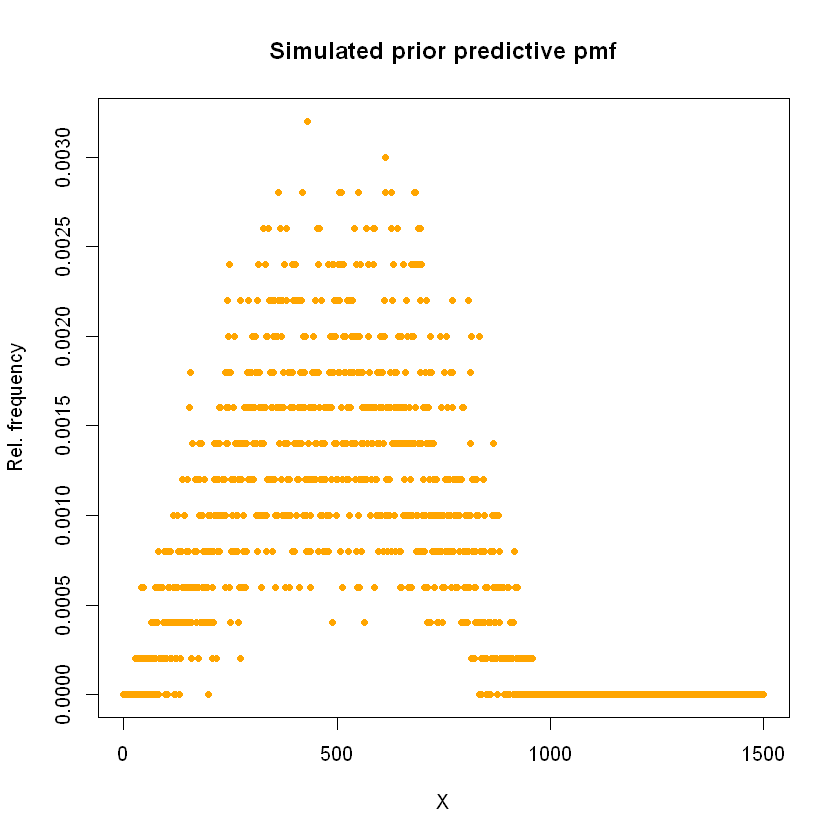

In [66]:
#define parameters
a0 <- 2.399999
b0 <- 2.473097


# obtain the empirical pmf
set.seed(24025)
N<-5000
X<-0:1500
theta<-rbeta(n,a0,b0)
y<-rbinom(N,n, theta)

# Empirical pmf
F<-rep(0,length(X))
for (i in X){
    F[i]<-sum(y==X[i])
    }
f<-F/N
rbind(F,round(f,2))
options(repr.plot.width=7,repr.plot.height=7)
plot(X,f,type="p",pch=19,cex=0.8,col="orange",main="Simulated prior predictive pmf",ylab="Rel. frequency")

#print the statistics
calculate_statistics(y)


Posterior predictive pmf

F,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Median: 438 
Mean: 438.3126 
Variance: 483.9877 
Mode: 433 


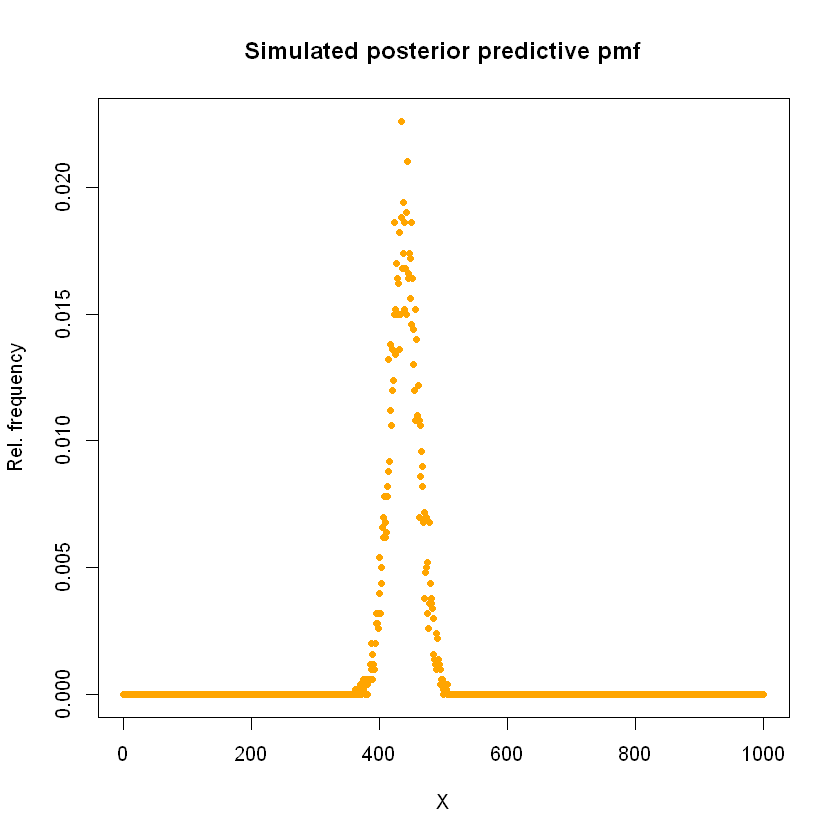

In [67]:
#posterior parameters
alpha_post <- a0 + x
beta_post <- b0 + n - x

# obtain the empirical pmf
set.seed(24025)
N<-5000
X<-0:1000
theta<-rbeta(n,alpha_post,beta_post)
y<-rbinom(N,n, theta)

# Empirical pmf
F<-rep(0,length(X))
for (i in X){
    F[i]<-sum(y==X[i])
    }
f<-F/N
rbind(F,round(f,2))
options(repr.plot.width=7,repr.plot.height=7)
plot(X,f,type="p",pch=19,cex=0.8,col="orange",main="Simulated posterior predictive pmf",ylab="Rel. frequency")


#print the statistics
calculate_statistics(y)

In the following table, we show the statistics for both simlated prior/posterior predictive pmf for Beta(α0,β0) distribution :

| | Simulated prior predictive pmf |Simulated posterior predictive pmf  |
|-|------------------------|------------------------------|
| Median       |   494    |       438            |
| Mean       |   491.947    |        438.3126       |
| Variance      |40978.47  |483.9877
|Mode      |430   |433


## Exercise 1.2
Simulate the prior predictive pmf with the nonconjugate piecewise linear pdf. Do it in both possible ways: (1) Sample from $h$ by the inverse transformation method and (2) Sample from its discretization. Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\textrm{Beta}(\alpha_0,\beta_0)$.

We will also compute the prior and posterior predictor pmf for x using $\alpha_0$ and $\beta_0$

Arturos Trial

The inverse transformation method is a technique for generating random samples from any probability distribution given its cumulative distribution function (CDF). Then you generate uniform random samples u in the interval [0,1] and find the value t such that H(t)=u.

We will start by calculating the cumulative distribution function of h(t). After doing the calculations, the following was obtained:


\begin{equation}
H(t) = \int_{-\infty}^t h(s) \, ds =
\begin{cases}
0, & t \leq 0 \\
a·t, & t \in (0, m-c) \\
a(m-c) + A(t-m+c) + \frac{b}{2c}(t^2 - (m-c)^2), & t \in [m-c, m] \\
a(m-c) + Ac + B(t-m) + \frac{b}{2c}(m^2 - c^2 + 2mc - t^2), & t \in [m, m+c] \\
a(t - 2c) + (A+B)c - b·c, & t \in (m+c, 1) \\
1, & t \geq 1
\end{cases}
\end{equation}



In the following code we define this function and plot it.

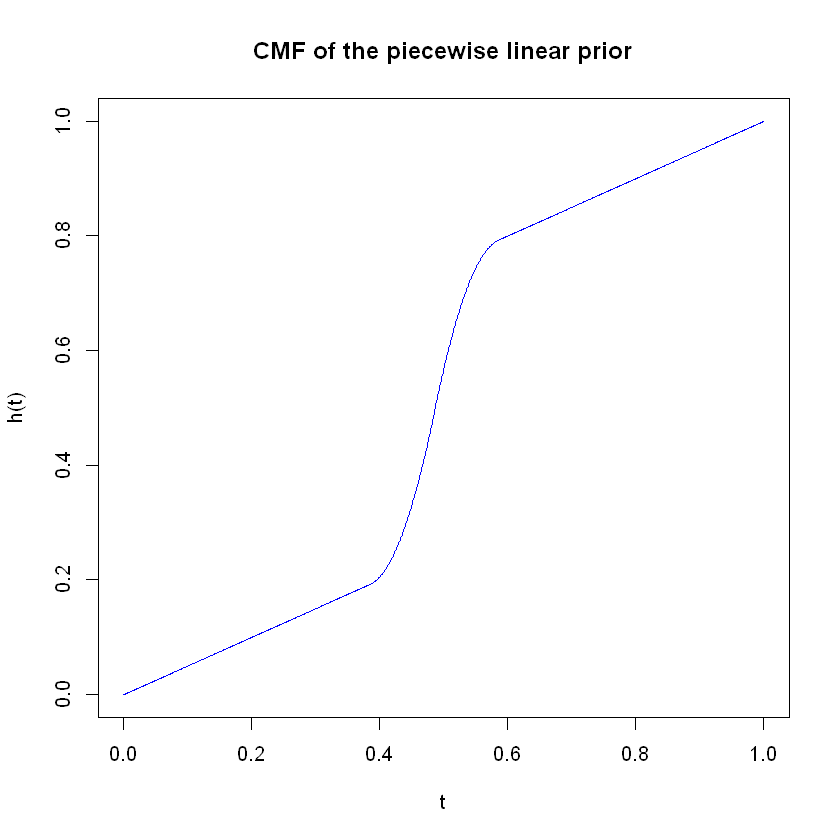

In [68]:
  a <- 0.5
  b <- 5.0
  m <- 0.485
  c <- 0.1
  A <- a + b - (b * m) / c
  B <- a + b + (b * m) / c

H <- function(t) {
  if (t <= 0) {
    return(0)
  } else if (t > 0 & t < m - c) {
    return(a * t)
  } else if (t >= m - c & t <= m) {
    return(a * (m - c) + A * (t - m + c) + (b / (2 * c)) * (t^2 - (m - c)^2))
  } else if (t > m & t <= m + c) {
    return(a * (m - c) + A * c + B * (t - m) + (b / (2 * c)) * (m^2 - c^2 + 2 * m * c - t^2))
  } else if (t > m + c & t < 1) {
    return(a * (t - 2 * c) + (A + B) * c - (b * c) )
  } else { # t >= 1
    return(1)
  }
}


# Create a sequence of t values
t_values <- seq(0, 1, length.out = 1000)
# Compute h(t) for each t value
h_values <- sapply(t_values, H)

# Plot the function
plot(t_values, h_values, type = 'l', col = 'blue', xlab = 't', ylab = 'h(t)', main = 'CMF of the piecewise linear prior')

Now we will define the function to sample from a uniform distribution between [0,1] and find t such that H(t)=u

In [69]:
# sample from h using inverse transformation method
inverse_transform_sampling <- function(n_samples) {
  u <- runif(n_samples) # generate uniform random numbers
  t_samples <- numeric(length(u))
  for (i in 1:length(u)) {
    interval <- c(0, 1)
    # use optimize to find the root within the interval
    t_samples[i] <- optimize(function(t) abs(H(t) - u[i]), interval = interval)$minimum
  }
  return(t_samples)
}

# Generate samples
n_samples <- 10000
prior_samples_inverse <- inverse_transform_sampling(n_samples)

The second approach is to discretize the space and sample from the discretized distribution

In [70]:
# Discretize h(t)
t_values <- seq(0, 1, length.out = 1000)
h_values <- h(t_values)
pmf <- h_values / sum(h_values)

# Sample from the discretized pmf
prior_samples_discretized <- sample(t_values, size = n_samples, replace = TRUE, prob = pmf)

If we get some statistics from the samples taken from both methods, we can see that they differ very slightly. But this could be due to the randomness of the process.If we look at the plots, both are practically the same.

In [71]:
# Compute summary statistics
median_inverse <- median(prior_samples_inverse)
mode_inverse <- t_values[which.max(density(prior_samples_inverse)$y)]
expectation_inverse <- mean(prior_samples_inverse)
sd_inverse <- sd(prior_samples_inverse)
sorted_samples_inverse <- sort(prior_samples_inverse)
credible_interval_inverse <- quantile(sorted_samples_inverse, probs = c(0.025, 0.975))




median_discretized <- median(prior_samples_discretized)
mode_discretized <- t_values[which.max(density(prior_samples_discretized)$y)]
expectation_discretized <- mean(prior_samples_discretized)
sd_discretized <- sd(prior_samples_discretized)
sorted_samples_discretized <- sort(prior_samples_discretized)
credible_interval_discretized <- quantile(sorted_samples_discretized, probs = c(0.025, 0.975))


# Print summary statistics
cat("Summary Statistics for Inverse Transform Sampling:\n")
cat("Median:", median_inverse, "\n")
cat("Mode:", mode_inverse, "\n")
cat("Expectation:", expectation_inverse, "\n")
cat("Standard Deviation:", sd_inverse, "\n")
cat("95% credible interval:", credible_interval_inverse, "\n")

cat("\nSummary Statistics for Discretized Sampling:\n")
cat("Median:", median_discretized, "\n")
cat("Mode:", mode_discretized, "\n")
cat("Expectation:", expectation_discretized, "\n")
cat("Standard Deviation:", sd_discretized, "\n")
cat("95% credible interval:", credible_interval_discretized, "\n")

Summary Statistics for Inverse Transform Sampling:
Median: 0.4852568 
Mode: 0.2472472 
Expectation: 0.4928596 
Standard Deviation: 0.2070028 
95% credible interval: 0.05035329 0.9532916 

Summary Statistics for Discretized Sampling:
Median: 0.4864865 
Mode: 0.2492492 


Expectation: 0.4934961 
Standard Deviation: 0.2097517 
95% credible interval: 0.04704705 0.953954 


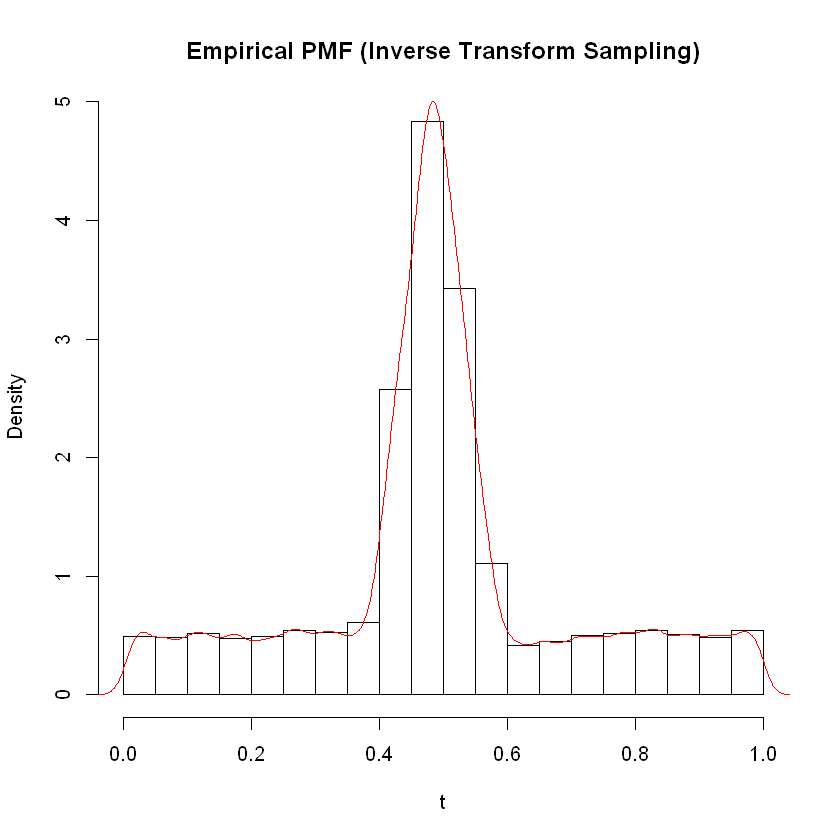

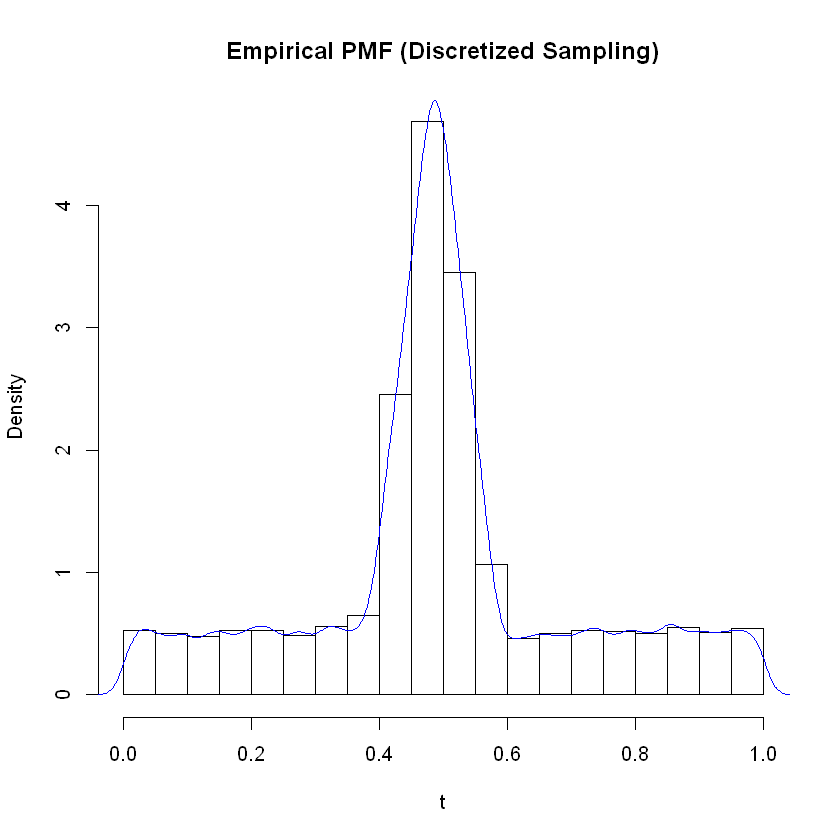

In [72]:
# Plot empirical pmf
hist(prior_samples_inverse, breaks = 30, freq = FALSE, main = "Empirical PMF (Inverse Transform Sampling)", xlab = "t")
lines(density(prior_samples_inverse), col = "red")

hist(prior_samples_discretized, breaks = 30, freq = FALSE, main = "Empirical PMF (Discretized Sampling)", xlab = "t")
lines(density(prior_samples_discretized), col = "blue")

Finally, we will compare this results to the one of using $Beta(\alpha_0,\beta_0)$ prior


| | Piecewise linear Prior (inverse) |Piecewise linear Prior (discretized)  | Beta(α0, β0) Prior |
|-------------|-------|------------------------|------------------------------|
| Expectation       | 0.4915431     | 0.4914646                  | 0.4461488              |
| Median       | 0.485794      | 0.4864865                  | 0.446               |
| 95% credible interval       | [0.04695804, 0.9481713 ]    | [0.04804805, 0.954955]                 | [0.415, 0.477]               |


Both expectation and mean of peicewise linear prior (inverse & discretized) have similar values but compared to the Beta(α0,β0) distribution are larger. Also, the 95% credible interval of Beta(α0,β0) distribution is way smaller than the peicewise linear prior in both cases.

## Exercise 1.3
Simulate the posterior predictive pmf (given the observed data of 437 female births from 980 placenta previa births) with the nonconjugate piecewise linear pdf. Sample from the the discretization of the posterior pdf as in Exercise 1. Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\textrm{Beta}(\alpha_0,\beta_0)$.


Computing the necessary statistics:

In [73]:
calculate_statistics <- function(y) {
  # Function to calculate mode
  mode_of_y <- function(x) {
    ux <- unique(x)
    ux[which.max(tabulate(match(x, ux)))]
  }

  # Calculate statistics
  median_y <- median(y)
  mean_y <- mean(y)
  variance_y <- var(y)
  mode_y <- mode_of_y(y)

  # Display results
  cat("Median:", median_y, "\n")
  cat("Mean:", mean_y, "\n")
  cat("Variance:", variance_y, "\n")
  cat("Mode:", mode_y, "\n")
}

We know that the posterior predictive pmf will be $Beta-Binomial(n,\alpha_0 + x, \beta_0 + n - x)$

F,7,3,3,2,2,2,0,2,4,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Median: 475 
Mean: 480.1256 
Variance: 41031.55 
Mode: 488 


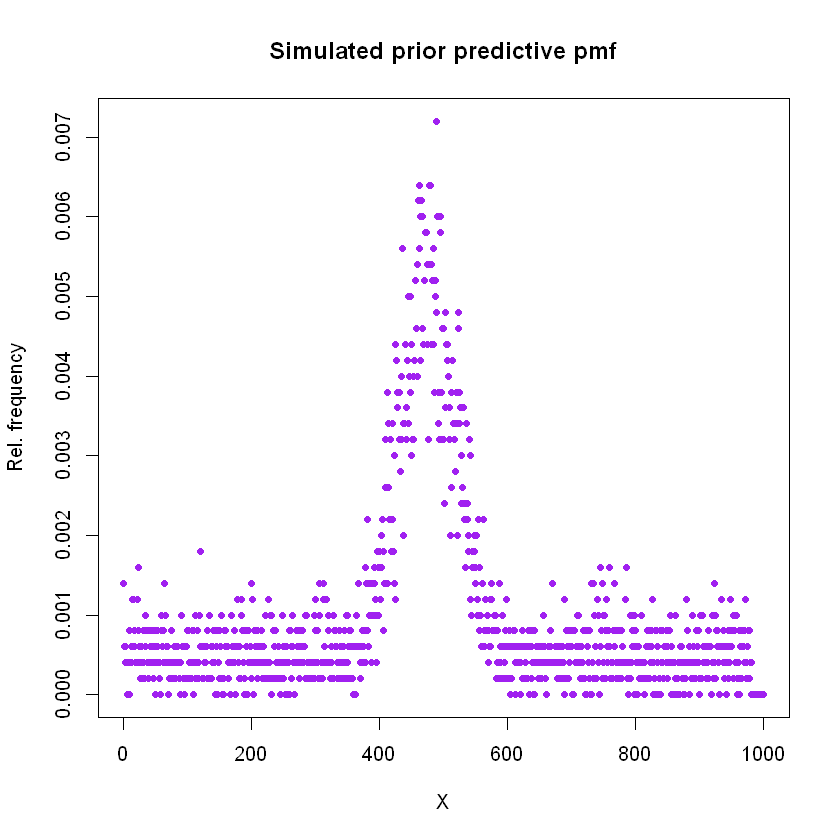

In [74]:
set.seed(24025)
# define the observed data
n <- 980
x <- 437
N<-5000
n_samples <- 10000
# Discretize h(t)
t_values <- seq(0, 1, length.out = 1000)
h_values <- h(t_values)
pmf <- h_values / sum(h_values)

# Sample from the discretized pmf
theta <- sample(t_values, size = n_samples, replace = TRUE, prob = pmf)

#sample x
y<-rbinom(N,n, theta)
X<-0:1000
# Empirical pmf
F<-rep(0,length(X))
for (i in X){
    F[i]<-sum(y==X[i])
    }
f<-F/N
rbind(F,round(f,2))
options(repr.plot.width=7,repr.plot.height=7)

plot(X,f,type="p",pch=19,cex=0.8,col="purple",main="Simulated prior predictive pmf",ylab="Rel. frequency")

calculate_statistics(y)

Median: 0.4524525 
Mean: 0.4527331 
Variance: 0.0002177686 
Mode: 0.4514515 


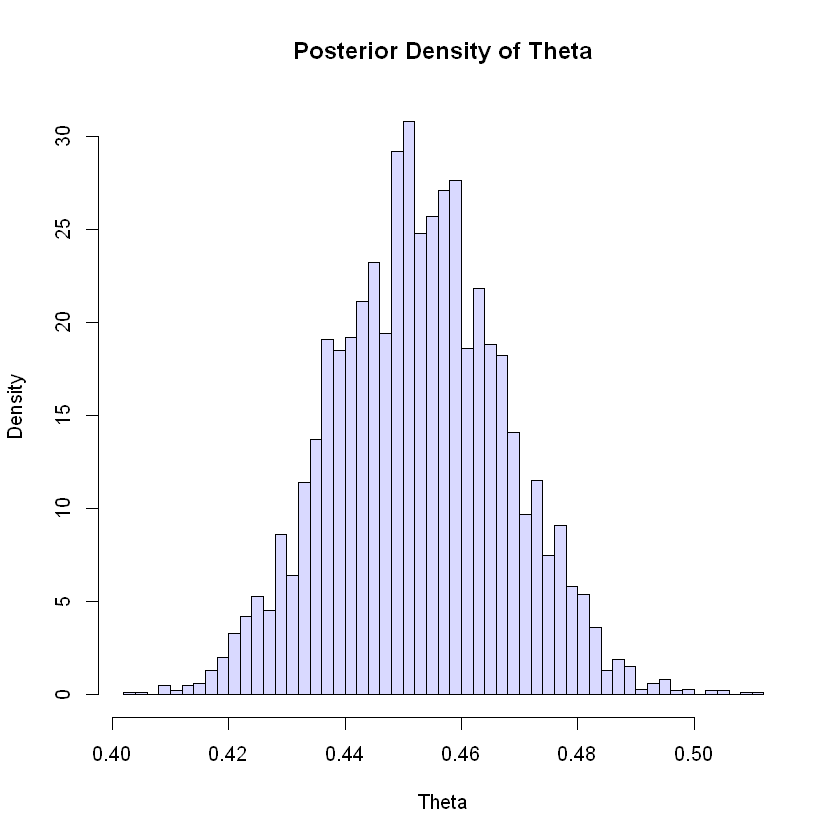

In [75]:
# Likelihood for each sampled theta
likelihood <- theta^x * (1 - theta)^(n - x)

# Compute new weights as the product of prior and likelihood
# Normalize to form a probability distribution
posterior_weights <- likelihood * pmf[match(theta, t_values)]
posterior_weights <- posterior_weights / sum(posterior_weights)
# Sample theta from the posterior distribution
posterior_samples <- sample(theta, size = N, replace = TRUE, prob = posterior_weights)

#plot(t_values, posterior_weights, type = 'l', col = 'blue', xlab = 't', ylab = 'h(t)', main = 'CMF of the piecewise linear prior')


# Compute a weighted kernel density estimate
#d <- density(posterior_samples, weights = posterior_weights, n = 512)  # Adjust 'n' for smoother curves

# Plot the histogram
hist(posterior_samples, probability = TRUE, breaks = 50, col = rgb(0.7, 0.7, 1, 0.5), main = "Posterior Density of Theta", xlab = "Theta", ylab = "Density")

# Overlay the density curve
#lines(d, col = "blue", lwd = 2)

calculate_statistics(posterior_samples)

Compute the posterior predictive pmf

Median: 443 
Mean: 443.6386 
Variance: 452.933 
Mode: 441 


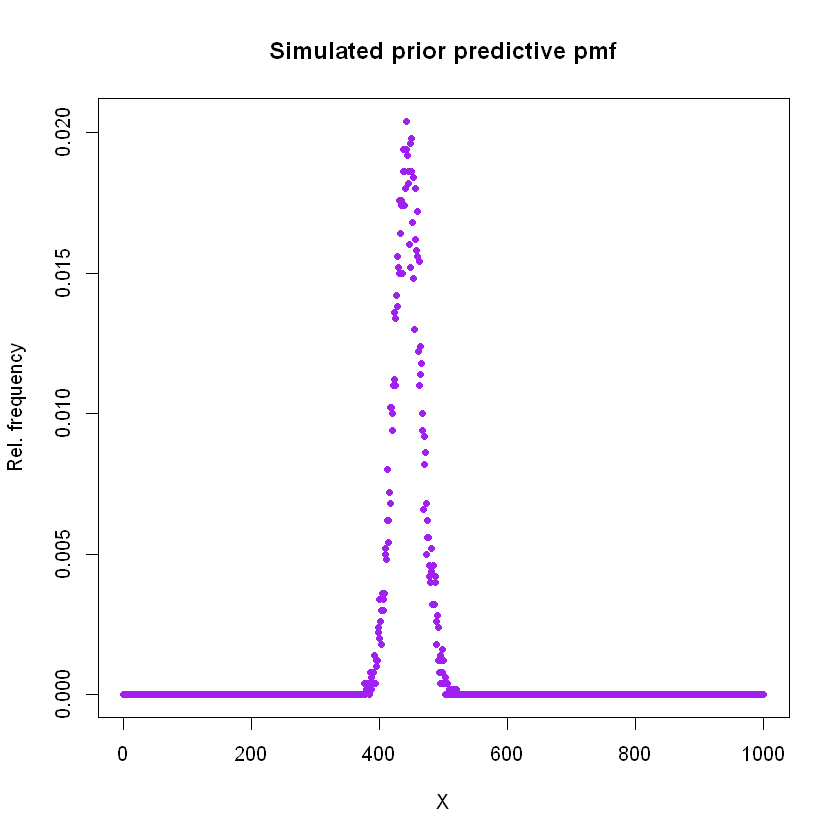

In [76]:
# Sample new data from the binomial distribution using sampled theta
new_y <- rbinom(N, n, posterior_samples)


# Compute the empirical PMF of the new data
new_F <- rep(0, length(X))
for (i in X) {
    new_F[i] <- sum(new_y == X[i])
}
new_f <- new_F / N

options(repr.plot.width=7,repr.plot.height=7)

plot(X,new_f,type="p",pch=19,cex=0.8,col="purple",main="Simulated prior predictive pmf",ylab="Rel. frequency")

calculate_statistics(new_y)

In the following table, we show the statistics for both simlated prior/posterior predictive pmf:

| | Simulated prior predictive pmf |Simulated posterior predictive pmf  |
|-|------------------------|------------------------------|
| Median       |   475     |       443             |
| Mean       |   480.1256     |        443.6386  |
| Variance      |41031.55  |452.933
|Mode      |488   |441

After including the evidence, the predictive distribution shifts towards the observed data. In the Beta(α0,β0) we notice that the expectation shifts more ( the median from 494 to 438 ). Also, the variance in the prior looks to be bigger in the posterior predictive pmf with the nonconjugate piecewise linear pdf than the variance in the prior of Beta(α0,β0) (variance form 41031.55 to 40978.47). However, in case of the Simulated posterior predictive pmf is the opposite (variance form 452.933 to 483.9877).

# Exercise 2: Asthma mortality

This exercise pertains to `Poisson.01.pub.ipynb` (lecture 7). Review this notebook as well as the notes concerning the Poisson model and do the following:

 1. Generate a sample from the prior predictive distribution.

 2. Generate a sample from the posterior predictive distribution after the first experiment (with $y=3$ after one year in a population of 200,000).

In both cases plot the simulated pmf and compare it with the theoretical one and estimate the probability of having more than 25 fatalities in the next 10 years (assuming all other conditions remain constant).

Theoretical mean of prior predictive distribution: 0.6 
Theoretical variance of prior predictive distribution: 0.12 


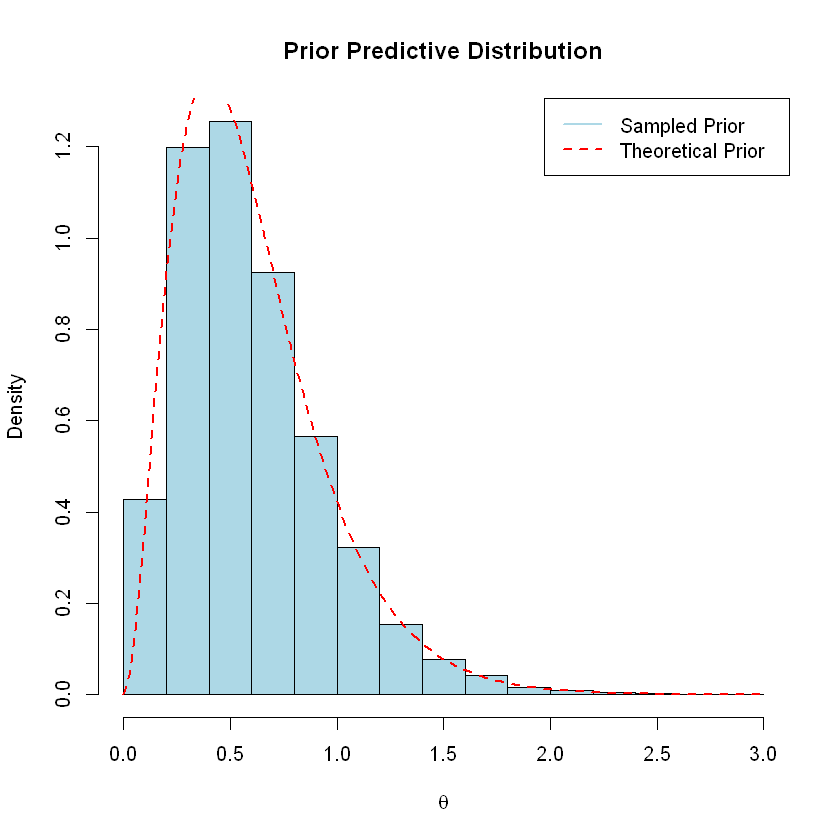

In [77]:
# set the parameters for the prior distribution
alpha <- 3
beta <- 5
N<-10000

# Generate a sample from the prior predictive distribution
prior_predictive_sample <- rgamma(N, alpha, beta)

# Plot the histogram of the prior predictive sample
hist(prior_predictive_sample, col="lightblue", freq=FALSE,
     main="Prior Predictive Distribution",
     xlab=expression(theta), ylab="Density")

# Plot the theoretical prior predictive distribution
curve(dgamma(x, shape = alpha, rate = beta),
      add = TRUE, col = "red", lwd = 2, lty = 2)

# Add legend
legend("topright", legend=c("Sampled Prior", "Theoretical Prior"),
       col=c("lightblue", "red"), lwd=2, lty=c(1,2))

# Calculate theoretical mean and variance
theoretical_mean <- alpha / beta
theoretical_variance <- alpha / beta^2

# Display theoretical mean and variance
cat("Theoretical mean of prior predictive distribution:", theoretical_mean, "\n")
cat("Theoretical variance of prior predictive distribution:", theoretical_variance, "\n")

In [78]:
# calculate the probability of more than 25 fatalities in the next 10 years for prior predictive distribution
probability_more_than_25_prior <- sum(1 - pgamma(25, shape = alpha, rate = beta)^seq(10))
cat("Probability of more than 25 fatalities in the next 10 years (prior):", probability_more_than_25_prior, "\n")

Probability of more than 25 fatalities in the next 10 years (prior): 0 


This exercise revolves around the Poisson model for asthma mortality, where we employ the gamma distribution as a prior for the mean rate of occurrence. In Bayesian statistics, we represent our prior beliefs about the parameter of interest using a probability distribution. Here, the gamma distribution serves as a suitable choice due to its flexibility in capturing a wide range of shapes. By setting the parameters of the gamma distribution, alpha and beta, we express our prior beliefs about the mortality rate.

The rgamma function then generates a sample from the prior predictive distribution, which incorporates both our prior beliefs and the inherent uncertainty about the mortality rate. We visualize this sample alongside the theoretical prior predictive distribution, obtained by calculating the probability density function of the gamma distribution. This comparison helps us understand how our sample aligns with the underlying theoretical distribution.

Additionally, we compute the theoretical mean and variance of the prior distribution, providing insights into its central tendency and spread. Finally, we estimate the probability of observing more than 25 fatalities in the next 10 years using the prior predictive distribution. This probabilistic prediction leverages the sampled data to make inferences about future events, demonstrating the predictive power of Bayesian inference in assessing future outcomes based on prior knowledge and observed data.

Theoretical mean of posterior predictive distribution: 2.999925e-05 
Theoretical variance of posterior predictive distribution: 1.499925e-10 


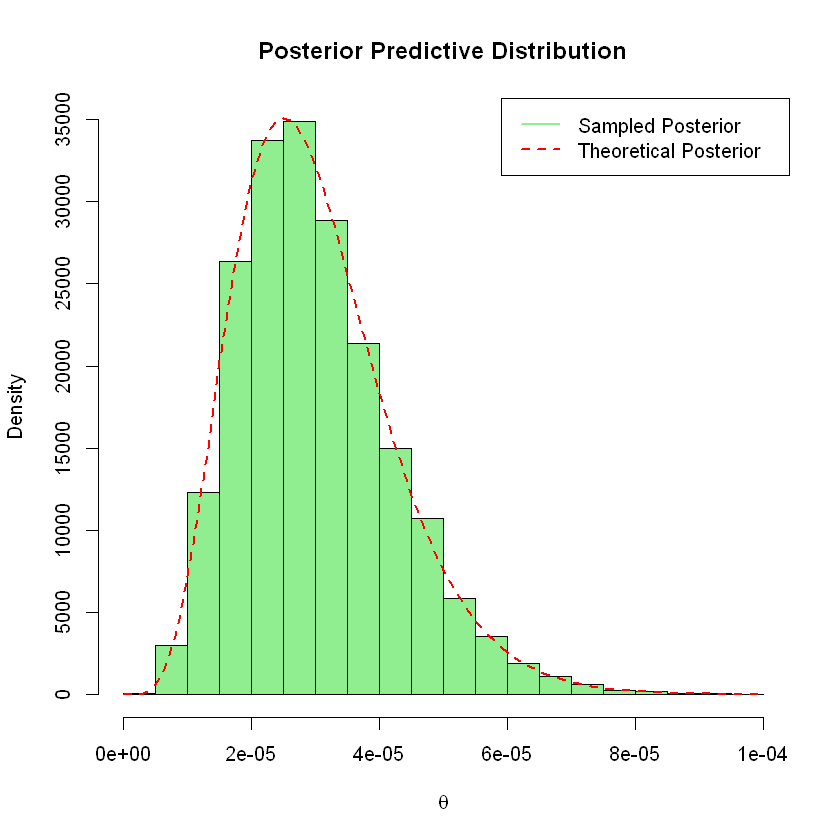

In [79]:
# define the observed data
y_observed <- 3
population_size <- 200000

# update alpha and beta based on the observed data
alpha_posterior <- alpha + y_observed
beta_posterior <- beta + population_size

# generate a sample from the posterior distribution
posterior_sample <- rgamma(N, alpha_posterior, beta_posterior)

# plot the histogram of the posterior predictive sample
hist(posterior_sample, col="lightgreen", freq=FALSE,
     main="Posterior Predictive Distribution",
     xlab=expression(theta), ylab="Density")

# plot the theoretical posterior predictive distribution
curve(dgamma(x, shape = alpha_posterior, rate = beta_posterior),
      add = TRUE, col = "red", lwd = 2, lty = 2)

# add legend
legend("topright", legend=c("Sampled Posterior", "Theoretical Posterior"),
       col=c("lightgreen", "red"), lwd=2, lty=c(1,2))

# calculate theoretical mean and variance of posterior predictive distribution
theoretical_mean_posterior <- alpha_posterior / beta_posterior
theoretical_variance_posterior <- alpha_posterior / beta_posterior^2

# display theoretical mean and variance
cat("Theoretical mean of posterior predictive distribution:", theoretical_mean_posterior, "\n")
cat("Theoretical variance of posterior predictive distribution:", theoretical_variance_posterior, "\n")


In [80]:
# calculate the probability of more than 25 fatalities in the next 10 years for posterior predictive distribution
probability_more_than_25_posterior <- sum(1 - pgamma(25, shape = alpha_posterior, rate = beta_posterior)^seq(10))
cat("Probability of more than 25 fatalities in the next 10 years (posterior):", probability_more_than_25_posterior, "\n")

Probability of more than 25 fatalities in the next 10 years (posterior): 0 


This implementation builds upon the Poisson model introduced earlier by incorporating observed data and updating our prior beliefs to form posterior distributions. Initially, we define the observed data, specifically the number of asthma fatalities observed in a population over a certain period. Using this information, we update our prior parameters, alpha and beta, with the observed data to obtain posterior parameters, reflecting our updated beliefs about the mortality rate.

Next, we generate a sample from the posterior distribution using the rgamma function, incorporating both our prior beliefs and the observed data. We then visualize this sample alongside the theoretical posterior predictive distribution, obtained by calculating the pdf of the gamma distribution with the updated parameters. This comparison provides insights into how our sampled posterior distribution aligns with the theoretical distribution derived from Bayesian inference.